In [34]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [35]:
xh57 = pd.read_csv("XH57_merged.csv")
xm156 = pd.read_csv("XM156_merged.csv")
xo18 = pd.read_csv("XO18_merged.csv")
xr31 = pd.read_csv("XR31_merged.csv")
xx84 = pd.read_csv("XX84_merged.csv")

In [44]:
for df in [xh57, xm156, xo18, xr31, xx84]:
    e = df[abs(df['elev']) > 65]

d = e[e['time'].isin(['00:00', '00:30', '01:00', '01:30', '02:00', '02:30', '03:00', '03:30'])]
d

,date,time,azi,elev,apmag,sbrt,observatory
0,2025-01-08,00:00,22.947882,-67.702345,18.727,n.a.,hf
84,2025-01-09,00:00,25.833385,-67.282180,18.713,n.a.,hf
170,2025-01-10,00:00,28.615974,-66.808387,18.699,n.a.,hf
260,2025-01-11,00:00,31.289399,-66.283945,18.686,n.a.,hf
353,2025-01-12,00:00,33.849740,-65.711941,18.673,n.a.,hf
449,2025-01-13,00:00,36.295153,-65.095503,18.662,n.a.,hf


In [80]:
xh57['Asteroid'] = 'xh57'
xm156['Asteroid'] = 'xm156'
xo18['Asteroid'] = 'xo18'
xr31['Asteroid'] = 'xr31'
xx84['Asteroid'] = 'xx84'

# Filtered DataFrames for elev > 65
xh57_65 = xh57[(abs(xh57['elev']) > 65) & (xh57['time'].isin(['00:00', '00:30', '01:00', '01:30', '02:00', '02:30', '03:00', '03:30']))]
xm156_65 = xm156[(abs(xm156['elev']) > 65) & (xm156['time'].isin(['00:00', '00:30', '01:00', '01:30', '02:00', '02:30', '03:00', '03:30']))]
xo18_65 = xo18[(abs(xo18['elev']) > 65) & (xo18['time'].isin(['00:00', '00:30', '01:00', '01:30', '02:00', '02:30', '03:00', '03:30']))]
xr31_65 = xr31[(abs(xr31['elev']) > 65) & (xr31['time'].isin(['00:00', '00:30', '01:00', '01:30', '02:00', '02:30', '03:00', '03:30']))]
xx84_65 = xx84[(abs(xx84['elev']) > 65) & (xx84['time'].isin(['00:00', '00:30', '01:00', '01:30', '02:00', '02:30', '03:00', '03:30']))]

# Filtered DataFrames for elev > 80
xh57_80 = xh57[(abs(xh57['elev']) > 80) & (xh57['time'].isin(['00:00', '00:30', '01:00', '01:30', '02:00', '02:30', '03:00', '03:30']))]
xm156_80 = xm156[(abs(xm156['elev']) > 80) & (xm156['time'].isin(['00:00', '00:30', '01:00', '01:30', '02:00', '02:30', '03:00', '03:30']))]
xo18_80 = xo18[(abs(xo18['elev']) > 80) & (xo18['time'].isin(['00:00', '00:30', '01:00', '01:30', '02:00', '02:30', '03:00', '03:30']))]
xr31_80 = xr31[(abs(xr31['elev']) > 80) & (xr31['time'].isin(['00:00', '00:30', '01:00', '01:30', '02:00', '02:30', '03:00', '03:30']))]
xx84_80 = xx84[(abs(xx84['elev']) > 80) & (xx84['time'].isin(['00:00', '00:30', '01:00', '01:30', '02:00', '02:30', '03:00', '03:30']))]

# Combine DataFrames for elev > 65
df_65 = pd.concat([xh57_65, xm156_65, xo18_65, xr31_65, xx84_65], ignore_index=True)

# Combine DataFrames for elev > 80
df_80 = pd.concat([xh57_80, xm156_80, xo18_80, xr31_80, xx84_80], ignore_index=True)

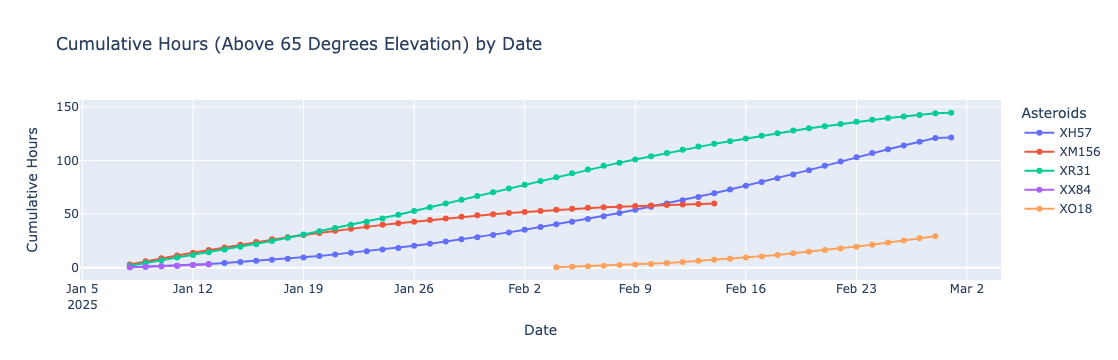

In [97]:
dfs = [
    (xh57_65, 'XH57'),
    (xm156_65, 'XM156'),
    (xo18_65, 'XO18'),
    (xr31_65, 'XR31'),
    (xx84_65, 'XX84')
]

# Combine all data into a single DataFrame
combined_df_65 = pd.concat(
    [df.assign(Asteroid=ticker) for df, ticker in dfs], ignore_index=True
)

# Ensure 'date' column is in datetime format
combined_df_65['date'] = pd.to_datetime(combined_df_65['date'], errors='coerce')

# Ensure 'time' column is converted to timedelta format if in hh:mm
combined_df_65['time'] = pd.to_timedelta(combined_df_65['time'], errors='coerce')

# Calculate cumulative counts grouped by date and ticker
cumulative_df_65 = (
    combined_df_65.groupby(['date', 'Asteroid']).size()  # Count occurrences for each date and ticker
    .groupby(level='Asteroid').cumsum()  # Calculate cumulative count for each ticker
    .reset_index(name='observations')
)

cumulative_df_65['hours'] = cumulative_df_65['observations'] / 2

# Create a line chart using Plotly Express
fig = px.line(
    cumulative_df_65,
    x='date',
    y='hours',
    color='Asteroid',
    labels={'date': 'Date', 'hours': 'Cumulative Hours', 'Asteroid': 'Asteroids'},
    title="Cumulative Hours (Above 65 Degrees Elevation) by Date",
    markers=True
)

# Customize the color scheme
fig.update_layout(colorway=px.colors.qualitative.G10)

fig.show()

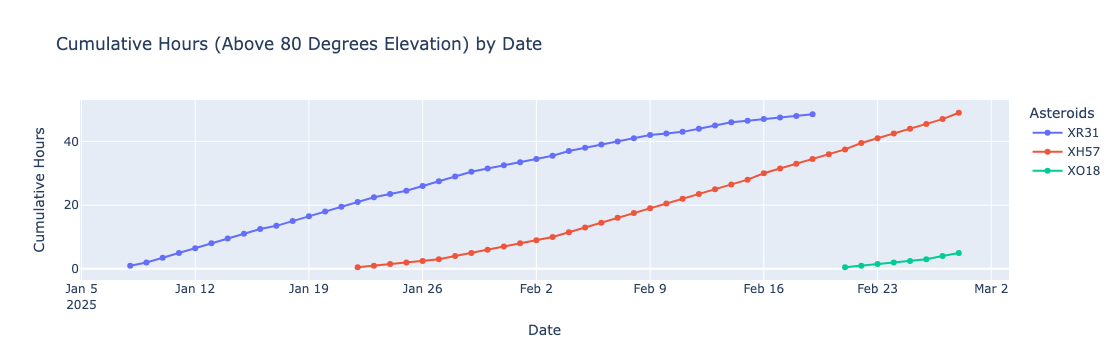

In [96]:
dfs = [
    (xh57_80, 'XH57'),
    (xm156_80, 'XM156'),
    (xo18_80, 'XO18'),
    (xr31_80, 'XR31'),
    (xx84_80, 'XX84')
]

# Combine all data into a single DataFrame
combined_df_80 = pd.concat(
    [df.assign(Asteroid=ticker) for df, ticker in dfs], ignore_index=True
)

# Ensure 'date' column is in datetime format
combined_df_80['date'] = pd.to_datetime(combined_df_80['date'], errors='coerce')

# Ensure 'time' column is converted to timedelta format if in hh:mm
combined_df_80['time'] = pd.to_timedelta(combined_df_80['time'], errors='coerce')

# Calculate cumulative counts grouped by date and ticker
cumulative_df_80 = (
    combined_df_80.groupby(['date', 'Asteroid']).size()  # Count occurrences for each date and ticker
    .groupby(level='Asteroid').cumsum()  # Calculate cumulative count for each ticker
    .reset_index(name='observations')
)

cumulative_df_80['hours'] = cumulative_df_80['observations'] / 2

# Create a line chart using Plotly Express
fig = px.line(
    cumulative_df_80,
    x='date',
    y='hours',
    color='Asteroid',
    labels={'date': 'Date', 'hours': 'Cumulative Hours', 'Asteroid': 'Asteroids'},
    title="Cumulative Hours (Above 80 Degrees Elevation) by Date",
    markers=True
)

# Customize the color scheme
fig.update_layout(colorway=px.colors.qualitative.G10)

fig.show()

  Asteroid  time
0     XH57   243
1    XM156   120
2     XO18    59
3     XR31   289
4     XX84     6


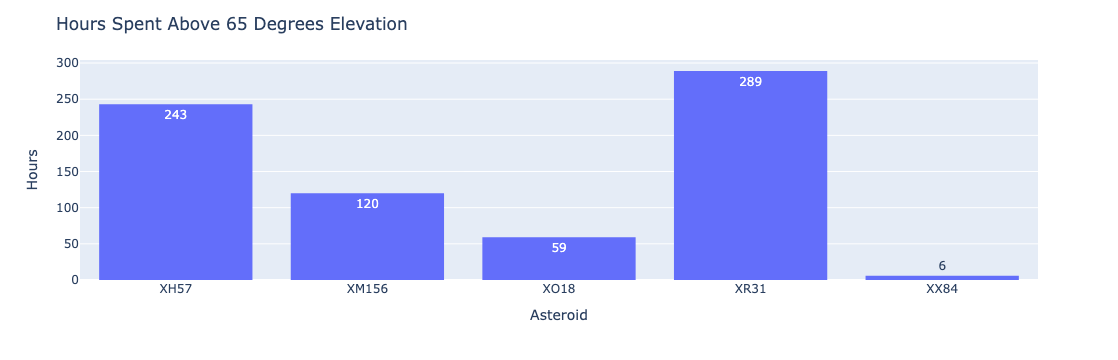

In [119]:
hours_aggregated_65 = combined_df_65.groupby('Asteroid')['time'].size().groupby(level='Asteroid').sum().reset_index(drop=False)
fig = px.histogram(hours_aggregated_65, x = 'Asteroid', y = 'time', text_auto=True)
fig.update_layout(
    title=dict(
        text="Hours Spent Above 65 Degrees Elevation"
    ),
    xaxis=dict(
        title=dict(
            text="Asteroid"
        )
    ),
    yaxis=dict(
        title=dict(
            text="Hours"
        )
    ))
fig.show()

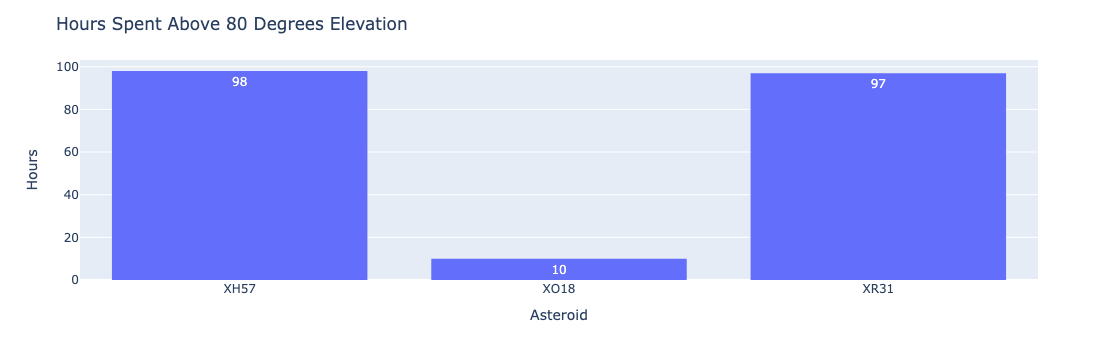

In [120]:
hours_aggregated_80 = combined_df_80.groupby('Asteroid')['time'].size().groupby(level='Asteroid').sum().reset_index(drop=False)
fig = px.histogram(hours_aggregated_80, x = 'Asteroid', y = 'time', text_auto=True)
fig.update_layout(
    title=dict(
        text="Hours Spent Above 80 Degrees Elevation"
    ),
    xaxis=dict(
        title=dict(
            text="Asteroid"
        )
    ),
    yaxis=dict(
        title=dict(
            text="Hours"
        )
    ))
fig.show()